<a href="https://colab.research.google.com/github/MartinNde/MartinN_1/blob/main/NLP_Applied_AI_competition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 
import re
import string

RANDOM_SEED = 100


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Understanding the problem and dataset

The target is to predict sentiment of new tweets which could either be positive or negative.

The first step is to load the data set.

In [54]:
df = pd.read_csv('/content/train.csv')

In [55]:
df.head()

,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [56]:
print(df.shape)

(16363, 3)


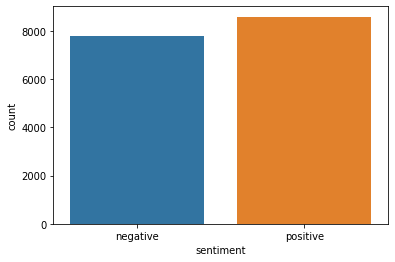

In [57]:
# Summarise class details
sns.countplot(x=df['sentiment'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16363 non-null  object
 1   text       16363 non-null  object
 2   sentiment  16363 non-null  object
dtypes: object(3)
memory usage: 383.6+ KB


In [59]:
df = df.dropna()

In [60]:
print(f'Number of entries :{len(df)}') # there were no mising values or entries since the entries are exactly the same as the original data

Number of entries :16363


In [61]:
df.describe()

,id,text,sentiment
count,16363,16363,16363
unique,16363,16363,2
top,549e992a42,Sooo SAD I will miss you here in San Diego!!!,positive
freq,1,1,8582


#Data preprocessing 

As data preprocessing techniques are as follows:

    Tokenisation
    Text normalisation (lower casing, stemming and lemmatisation)
    Stop word removal
    Punctuation removal


In [62]:
sent = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
print(sent)

  sentiment  text
1  positive  8582
0  negative  7781


In [63]:
 #remove any URLs
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))

df.head()
     

,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [64]:
#Lower Casing
df['text'] = df['text'].apply(lambda x: x.lower())

df.head()

,id,text,sentiment
0,549e992a42,sooo sad i will miss you here in san diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [65]:
#Removing Punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# apply the remove_punctuations function to the 'text' column of the data
df['text'] = df['text'].apply(remove_punctuations)

df.head()

,id,text,sentiment
0,549e992a42,sooo sad i will miss you here in san diego,negative
1,088c60f138,my boss is bullying me,negative
2,9642c003ef,what interview leave me alone,negative
3,358bd9e861,sons of why couldnt they put them on the rel...,negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [66]:
#Lower Casing
df['text'] = df['text'].apply(lambda x: x.lower())

df.head()

,id,text,sentiment
0,549e992a42,sooo sad i will miss you here in san diego,negative
1,088c60f138,my boss is bullying me,negative
2,9642c003ef,what interview leave me alone,negative
3,358bd9e861,sons of why couldnt they put them on the rel...,negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [67]:
# remove stopwords from tokens

# define set of English stopwords
stop_words = set(stopwords.words('english')) 

# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
    words = sentence.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_words)
    return filtered_sentence

# Apply the function to the 'text' column of the DataFrame
df['filtered_text'] = df['text'].apply(remove_stop_words)


# Print the first 5 rows of the DataFrame
print(df.head())

           id                                               text sentiment  \
0  549e992a42         sooo sad i will miss you here in san diego  negative   
1  088c60f138                             my boss is bullying me  negative   
2  9642c003ef                      what interview leave me alone  negative   
3  358bd9e861   sons of  why couldnt they put them on the rel...  negative   
4  6e0c6d75b1  2am feedings for the baby are fun when he is a...  positive   

                              filtered_text  
0                   sooo sad miss san diego  
1                             boss bullying  
2                     interview leave alone  
3  sons couldnt put releases already bought  
4         2am feedings baby fun smiles coos  


In [69]:
#Removing Punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# apply the remove_punctuations function to the 'text' column of the data
df['text'] = df['text'].apply(remove_punctuations)

df.head()

,id,text,sentiment,filtered_text
0,549e992a42,sooo sad i will miss you here in san diego,negative,sooo sad miss san diego
1,088c60f138,my boss is bullying me,negative,boss bullying
2,9642c003ef,what interview leave me alone,negative,interview leave alone
3,358bd9e861,sons of why couldnt they put them on the rel...,negative,sons couldnt put releases already bought
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings baby fun smiles coos


#Tokenisation 

The tokenized model use is the TweetTokenizer - This is because the work is on tweets.

TweetTokenizer - Tokenizer for tweets
